In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

gun_df = pd.read_csv('./data/stage3.csv')

In [2]:
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239677 non-null  int64  
 1   date                         239677 non-null  object 
 2   state                        239677 non-null  object 
 3   city_or_county               239677 non-null  object 
 4   address                      223180 non-null  object 
 5   n_killed                     239677 non-null  int64  
 6   n_injured                    239677 non-null  int64  
 7   incident_url                 239677 non-null  object 
 8   source_url                   239209 non-null  object 
 9   incident_url_fields_missing  239677 non-null  bool   
 10  congressional_district       227733 non-null  float64
 11  gun_stolen                   140179 non-null  object 
 12  gun_type                     140226 non-null  object 
 13 

In [4]:
def col_to_list(col_string):
    try:
        col_string = col_string.replace('||', '|')
        col_string = col_string.replace('::', ':')
        col_string = col_string.split('|')
        col_list = []
        for person in col_string:
            person = person.split(':')
            col_list.append(person[1])
        return col_list
    except:
        return []

participant_list = gun_df['participant_type'].map(col_to_list)

gun_df['participant_type'] = participant_list

In [6]:
gun_df.head(20)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,"[Victim, Victim, Victim, Victim, Subject-Suspect]",http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,"[Victim, Victim, Victim, Victim, Subject-Suspect]",http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...","[Subject-Suspect, Subject-Suspect, Victim, Vic...",http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,"[Victim, Victim, Victim, Subject-Suspect]",http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,"[Victim, Victim, Victim, Subject-Suspect]",http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Rebeika Powell||1::Kayetie Melchor||2::Mist...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,"[Victim, Victim, Victim, Victim, Subject-Suspe...",http://www.kjrh.com/news/local-news/4-found-sh...,72.0,11.0
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,...,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Greg Griego||1::Sara Griego||2::Zephania Gr...,5::Family,0::Killed||1::Killed||2::Killed||3::Killed||4:...,"[Victim, Victim, Victim, Victim, Victim, Subje...",http://www.cbsnews.com/news/nehemiah-gringo-ca...,10.0,14.0
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,NaN,NaN,0::M

In [7]:
def col_to_dict(col_string):
    try:
        col_string = col_string.replace('||', '|')
        col_string = col_string.replace('::', ':')
        col_string = col_string.split('|')
        col_dict = dict()
        for person in col_string:
            person = person.split(':')
            col_dict[int(person[0])] = person[1]
        return col_dict
    except:
        return {}
    

columns_to_change = ['participant_age', 'participant_age_group', 'participant_gender', 'participant_status']

for col in columns_to_change:
    gun_df[col] = gun_df[col].map(col_to_dict)

In [17]:
gun_df.head(10)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,{0: '20'},"{0: 'Adult 18+', 1: 'Adult 18+', 2: 'Adult 18+...","{0: 'Male', 1: 'Male', 3: 'Male', 4: 'Female'}",0::Julian Sims,NaN,"{0: 'Arrested', 1: 'Injured', 2: 'Injured', 3:...","[Victim, Victim, Victim, Victim, Subject-Suspect]",http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,{0: '20'},"{0: 'Adult 18+', 1: 'Adult 18+', 2: 'Adult 18+...",{0: 'Male'},0::Bernard Gillis,NaN,"{0: 'Killed', 1: 'Injured', 2: 'Injured', 3: '...","[Victim, Victim, Victim, Victim, Subject-Suspect]",http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,"{0: '25', 1: '31', 2: '33', 3: '34', 4: '33'}","{0: 'Adult 18+', 1: 'Adult 18+', 2: 'Adult 18+...","{0: 'Male', 1: 'Male', 2: 'Male', 3: 'Male', 4...",0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"{0: 'Injured, Unharmed, Arrested', 1: 'Unharme...","[Subject-Suspect, Subject-Suspect, Victim, Vic...",http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,"{0: '29', 1: '33', 2: '56', 3: '33'}","{0: 'Adult 18+', 1: 'Adult 18+', 2: 'Adult 18+...","{0: 'Female', 1: 'Male', 2: 'Male', 3: 'Male'}",0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,"{0: 'Killed', 1: 'Killed', 2: 'Killed', 3: 'Ki...","[Victim, Victim, Victim, Subject-Suspect]",http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,"{0: '18', 1: '46', 2: '14', 3: '47'}","{0: 'Adult 18+', 1: 'Adult 18+', 2: 'Teen 12-1...","{0: 'Female', 1: 'Male', 2: 'Male', 3: 'Female'}",0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,"{0: 'Injured', 1: 'Injured', 2: 'Killed', 3: '...","[Victim, Victim, Victim, Subject-Suspect]",http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,"{0: '23', 1: '23', 2: '33', 3: '55'}","{0: 'Adult 18+', 1: 'Adult 18+', 2: 'Adult 18+...","{0: 'Female', 1: 'Female', 2: 'Female', 3: 'Fe...",0::Rebeika Powell||1::Kayetie Melchor||2::Mist...,NaN,"{0: 'Killed', 1: 'Killed', 2: 'Killed', 3: 'Ki...","[Victim, Victim, Victim, Victim, Subject-Suspe...",http://www.kjrh.com/news/local-news/4-found-sh...,72.0,11.0
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,...,"{0: '51', 1: '40', 2: '9', 3: '5', 4: '2', 5: ...","{0: 'Adult 18+', 1: 'Adult 18+', 2: 'Child 0-1...","{0: 'Male', 1: 'Female', 2: 'Male', 3: 'Female...",0::Greg Griego||1::Sara Griego||2::Zephania Gr...,5::Family,"{0: 'Killed', 1: 'Killed', 2: 'Killed', 3: 'Ki...","[Victim, Victim, Victim, Victim, Victim, Subje...",http://www.cbsnews.com/news/nehemiah-gringo-ca...,10.0,14.0
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle St

In [18]:
def modify_age_group_row(r):
    new_list = [np.nan] * len(r['participant_type'])
    for k, v in r['participant_age_group'].items():
        new_list[k] = v
    r['participant_age_group'] = new_list
    return r

participant_age_group_col = gun_df.apply(modify_age_group_row, axis=1)['participant_age_group']
participant_age_group_col

0         [Adult 18+, Adult 18+, Adult 18+, Adult 18+, A...
1         [Adult 18+, Adult 18+, Adult 18+, Adult 18+, nan]
2         [Adult 18+, Adult 18+, Adult 18+, Adult 18+, A...
3              [Adult 18+, Adult 18+, Adult 18+, Adult 18+]
4             [Adult 18+, Adult 18+, Teen 12-17, Adult 18+]
                                ...                        
239672                                          [Adult 18+]
239673                               [Adult 18+, Adult 18+]
239674                                          [Adult 18+]
239675                                          [Adult 18+]
239676                               [Adult 18+, Adult 18+]
Name: participant_age_group, Length: 239677, dtype: object

In [19]:
def modify_status_row(r):
    new_list = [np.nan] * len(r['participant_type'])
    for k, v in r['participant_status'].items():
        new_list[k] = v
    r['participant_status'] = new_list
    return r

participant_status_col = gun_df.apply(modify_status_row, axis=1)['participant_status']
participant_status_col

0            [Arrested, Injured, Injured, Injured, Injured]
1                  [Killed, Injured, Injured, Injured, nan]
2         [Injured, Unharmed, Arrested, Unharmed, Arrest...
3                          [Killed, Killed, Killed, Killed]
4                        [Injured, Injured, Killed, Killed]
                                ...                        
239672                                 [Unharmed, Arrested]
239673                         [Killed, Unharmed, Arrested]
239674                                            [Injured]
239675                                             [Killed]
239676                                     [Killed, Killed]
Name: participant_status, Length: 239677, dtype: object

In [20]:
def modify_gender_row(r):
    new_list = [np.nan] * len(r['participant_type'])
    for k, v in r['participant_gender'].items():
        new_list[k] = v
    r['participant_gender'] = new_list
    return r

participant_gender_col = gun_df.apply(modify_gender_row, axis=1)['participant_gender']
participant_gender_col


0         [Male, Male, nan, Male, Female]
1              [Male, nan, nan, nan, nan]
2          [Male, Male, Male, Male, Male]
3              [Female, Male, Male, Male]
4            [Female, Male, Male, Female]
                       ...               
239672                           [Female]
239673                       [Male, Male]
239674                             [Male]
239675                             [Male]
239676                     [Female, Male]
Name: participant_gender, Length: 239677, dtype: object

In [26]:
sub_df = gun_df[['incident_id', 'date', 'state', 'city_or_county', 'n_killed', 'n_injured', 'congressional_district', 'incident_characteristics', 'latitude', 'longitude', 'participant_type']].copy()
sub_df

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,incident_characteristics,latitude,longitude,participant_type
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,"[Victim, Victim, Victim, Victim, Subject-Suspect]"
1,460726,2013-01-01,California,Hawthorne,1,3,43.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,-118.3330,"[Victim, Victim, Victim, Victim, Subject-Suspect]"
2,478855,2013-01-01,Ohio,Lorain,1,3,9.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,-82.1377,"[Subject-Suspect, Subject-Suspect, Victim, Vic..."
3,478925,2013-01-05,Colorado,Aurora,4,0,6.0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,-104.8020,"[Victim, Victim, Victim, Subject-Suspect]"
4,478959,2013-01-07,North Carolina,Greensboro,2,2,6.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,-79.9569,"[Victim, Victim, Victim, Subject-Suspect]"
...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,0,0,NaN,Shots Fired - No Injuries,NaN,NaN,[Subject-Suspect]
239673,1083139,2018-03-31,Louisiana,Natchitoches,1,0,4.0,"Shot - Dead (murder, accidental, suicide)||Ins...",31.7537,-93.0836,"[Victim, Subject-Suspect]"
239674,1083151,2018-03-31,Louisiana,Gretna,0,1,2.0,Shot - Wounded/Injured,29.9239,-90.0442,[Victim]
239675,1082514,2018-03-31,Texas,Houston,1,0,9.0,"Shot - Dead (murder, accidental, suicide)",29.7201,-95.6110,[Victim]


In [24]:
col1 = participant_age_group_col.explode()
col2 = participant_gender_col.explode()
col3 = participant_status_col.explode()

age_gender_status_df = pd.concat([col1, col2, col3], axis=1)
age_gender_status_df

,participant_age_group,participant_gender,participant_status
0,Adult 18+,Male,Arrested
0,Adult 18+,Male,Injured
0,Adult 18+,NaN,Injured
0,Adult 18+,Male,Injured
0,Adult 18+,Female,Injured
...,...,...,...
239673,Adult 18+,Male,"Unharmed, Arrested"
239674,Adult 18+,Male,Injured
239675,Adult 18+,Male,Killed
239676,Adult 18+,Female,Killed


In [58]:
new_gun_df = pd.concat([sub_df.explode('participant_type'), age_gender_status_df], axis=1)
new_gun_df

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,incident_characteristics,latitude,longitude,participant_type,participant_age_group,participant_gender,participant_status
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,Victim,Adult 18+,Male,Arrested
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,Victim,Adult 18+,Male,Injured
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,Victim,Adult 18+,NaN,Injured
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,Victim,Adult 18+,Male,Injured
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,Subject-Suspect,Adult 18+,Female,Injured
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239673,1083139,2018-03-31,Louisiana,Natchitoches,1,0,4.0,"Shot - Dead (murder, accidental, suicide)||Ins...",31.7537,-93.0836,Subject-Suspect,Adult 18+,Male,"Unharmed, Arrested"
239674,1083151,2018-03-31,Louisiana,Gretna,0,1,2.0,Shot - Wounded/Injured,29.9239,-90.0442,Victim,Adult 18+,Male,Injured
239675,1082514,2018-03-31,Texas,Houston,1,0,9.0,"Shot - Dead (murder, accidental, suicide)",29.7201,-95.6110,Victim,Adult 18+,Male,Killed
239676,1081940,2018-03-31,Maine,Norridgewock,2,0,2.0,"Shot - Dead (murder, accidental, suicide)||Sui...",44.7293,-69.7691,Victim,Adult 18+,Female,Killed


In [59]:
new_gun_df.groupby(['participant_type', 'participant_gender', 'participant_age_group']).aggregate('count')['incident_id'].to_frame()

incident_id
participant_type participant_gender participant_age_group             
Subject-Suspect  Female             Adult 18+                    10581
                                    Child 0-11                      38
                                    Teen 12-17                     532
                 Male               Adult 18+                   138902
                                    Child 0-11                     398
                                    Teen 12-17                   10693
Victim           Female             Adult 18+                    26007
                                    Child 0-11                    1173
                                    Teen 12-17                    2063
                 Male               Adult 18+                   118413
                                    Child 0-11                    2095
                                    Teen 12-17                    9546
                 Male, female       Adult 18+                        1

In [60]:
new_gun_df[(new_gun_df['participant_type'] == 'Victim') & (new_gun_df['participant_status'].str.contains('Arrested'))]

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,incident_characteristics,latitude,longitude,participant_type,participant_age_group,participant_gender,participant_status
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,Victim,Adult 18+,Male,Arrested
234,492985,2013-11-03,California,Perris,0,5,41.0,Shot - Wounded/Injured||Drive-by (car to stree...,33.8249,-117.2270,Victim,Adult 18+,Male,"Injured, Arrested"
317,92418,2014-01-01,New Jersey,Clementon,0,0,1.0,Armed robbery with injury/death and/or evidenc...,39.7981,-75.0288,Victim,Teen 12-17,Male,"Unharmed, Arrested"
1032,93682,2014-01-06,Oregon,Hillsboro,0,1,1.0,Shot - Wounded/Injured||Gang involvement||Poss...,45.5252,-122.9920,Victim,Adult 18+,Male,"Injured, Arrested"
2218,96649,2014-01-14,Pennsylvania,Stroudsburg,1,0,17.0,"Shot - Dead (murder, accidental, suicide)||Dri...",40.9764,-75.2797,Victim,Adult 18+,Male,"Killed, Arrested"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238305,1076074,2018-03-22,Missouri,Saint Charles,0,1,3.0,Shot - Wounded/Injured,38.7772,-90.4916,Victim,Adult 18+,Male,"Unharmed, Arrested"
238344,1077602,2018-03-22,California,Red Bluff,0,0,1.0,Non-Shooting Incident||Home Invasion||Home Inv...,40.1405,-122.2110,Victim,Adult 18+,Male,"Unharmed, Arrested"
238620,1077641,2018-03-24,New York,Westbury,0,1,4.0,Shot - Wounded/Injured||Home Invasion||Home In...,40.7529,-73.5701,Victim,Adult 18+,Male,"Unharmed, Arrested"
238809,1079551,2018-03-25,Indiana,Syracuse,0,1,2.0,Shot - Wounded/Injured||Defensive Use||Defensi...,41.4350,-85.7564,Victim,Teen 12-17,Male,"Unharmed, Arrested"


In [61]:
new_gun_df[new_gun_df['participant_type'] == 'Victim'].groupby(['participant_gender', 'participant_age_group', 'participant_status']).aggregate('count')['incident_id'].to_frame()

incident_id
participant_gender participant_age_group participant_status                      
Female             Adult 18+             Arrested                               7
                                         Injured                            12205
                                         Injured, Arrested                     31
                                         Injured, Unharmed                      3
                                         Killed                              7608
                                         Killed, Arrested                       2
                                         Killed, Injured                        1
                                         Killed, Unharmed                       1
                                         Unharmed                            5887
                                         Unharmed, Arrested                    84
                   Child 0-11            Injured                              639
                                         Killed                               338
                                         Unharmed                             192
                                         Unharmed, Arrested                     1
                   Teen 12-17            Injured                             1330
                                         Injured, Arrested                      3
                                         Killed                               458
                                         Killed, Arrested                       1
                                         Unharmed                             251
                                         Unharmed, Arrested                     1
Male               Adult 18+             Arrested                              55
                                         Injured                            67486
                                         Injured, Arrested                    527
                                         Injured, Unharmed                     16
                                         Injured, Unharmed, Arrested            2
                                         Killed                             38161
                                         Killed, Arrested                      12
                                         Killed, Injured                        7
                                         Killed, Unharmed                       5
                                         Killed, Unharmed, Arrested             3
                                         Unharmed                           11083
                                         Unharmed, Arrested                   675
                   Child 0-11            Injured                             1088
                                         Killed                               568
                                         Unharmed                             429
                                         Unharmed, Arrested                     3
                   Teen 12-17            Arrested                               8
                                         Injured                             6630
                                         Injured, Arrested                     33
                                         Killed                              2264
                                         Killed, Injured                        1
                                         Unharmed                             538
                                         Unharmed, Arrested                    50
Male, female       Adult 18+             Injured                                1

In [63]:
new_gun_df['participant_status'] = new_gun_df['participant_status'].fillna(value='Unknown')

In [66]:
new_gun_df[new_gun_df['participant_status'].str.contains('Killed')].groupby('participant_gender').aggregate('count')['incident_id']

participant_gender
Female     8936
Male      50340
Name: incident_id, dtype: int64

In [83]:
gun_df['incident_characteristics'].str.contains('Non-Shooting Incident').sum() / len(gun_df)

0.1870726018766924

In [71]:
new_gun_df['incident_characteristics'] = new_gun_df['incident_characteristics'].fillna(value='Unknown')

In [88]:
assault_weapon_df = new_gun_df[new_gun_df['incident_characteristics'].str.contains('Assault weapon')]
awcas = assault_weapon_df.groupby('incident_id').aggregate('mean')[['n_killed', 'n_injured']]
assault_weapon_df['incident_characteristics'].str.contains('Non-Shooting Incident').sum() / len(assault_weapon_df)


0.5190078813166434

<AxesSubplot:xlabel='participant_gender,participant_age_group'>

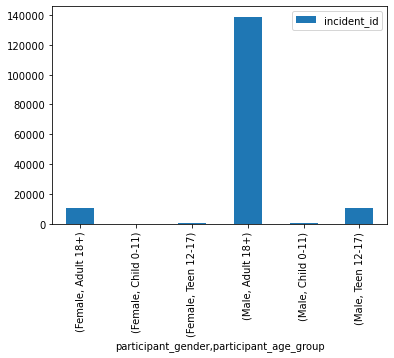

In [95]:
new_gun_df = new_gun_df[new_gun_df['participant_gender'] != 'Male, female']
suspect_breakdown = new_gun_df[new_gun_df['participant_type'] == 'Subject-Suspect'].groupby(['participant_gender', 'participant_age_group']).aggregate('count')['incident_id'].to_frame()
suspect_breakdown.plot.bar()

In [100]:
new_gun_df[new_gun_df['incident_characteristics'].str.contains('Accidental Shooting')].groupby('incident_id').aggregate('mean')[['n_killed', 'n_injured']].sum()

n_killed     1863
n_injured    5986
dtype: int64